In [2]:
from jqdatasdk import *
auth('13196967853','Gzx200312')

auth success 


In [31]:
import numpy as np
import pandas as pd

price=pd.read_csv("D:/Code/data/rb2501_xsge.csv")['close'].tail(60)

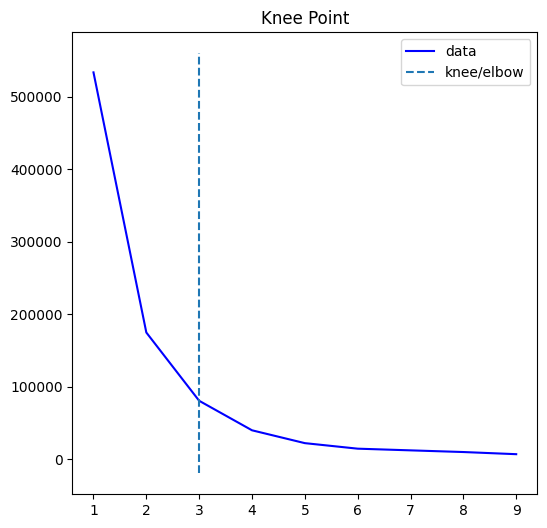

In [48]:
X = np.array(price)
from sklearn.cluster import KMeans
import numpy as np
from kneed import KneeLocator
 
sum_of_sq_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X.reshape(-1,1))
    sum_of_sq_distances.append(km.inertia_)
kn = KneeLocator(K, sum_of_sq_distances,S=1.0, curve="convex", direction="decreasing")
kn.plot_knee()

In [49]:
kmeans = KMeans(n_clusters= kn.knee).fit(X.reshape(-1,1))
c = kmeans.predict(X.reshape(-1,1))
min_and_max = []
for i in range(kn.knee):
    min_and_max.append([-np.inf,np.inf])
for i in range(len(X)):
    cluster = c[i]
    if X[i] > min_and_max[cluster][0]:
        min_and_max[cluster][0] = X[i]
    if X[i] < min_and_max[cluster][1]:
        min_and_max[cluster][1] = X[i]

In [50]:
min_and_max

[[np.float64(3588.0), np.float64(3455.0)],
 [np.float64(3708.0), np.float64(3596.0)],
 [np.float64(3829.0), np.float64(3715.0)]]